In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from matplotlib.image import imread
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import *
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is NOT AVAILABLE


In [2]:
data_dev = []
data_test = []
data_train = []
file_name_dev = "audioDataDev.pickle"
file_name_test = "audioDataTest.pickle"
file_name_train = "audioDataTrain.pickle"

with (open(file_name_dev, "rb")) as f:
    while True:
        try:
            data_dev.append(pickle.load(f))
        except EOFError:
            break
f.close()

with (open(file_name_test, "rb")) as f:
    while True:
        try:
            data_test.append(pickle.load(f))
        except EOFError:
            break
f.close()

with (open(file_name_train, "rb")) as f:
    while True:
        try:
            data_train.append(pickle.load(f))
        except EOFError:
            break
f.close()

In [40]:
X_dev = []
y_dev = []
X_train = []
y_train = []
X_test = []
y_test = []

for i in range(len(data_dev)-1):
    X_dev.append(data_dev[i+1][3])
for i in range(len(data_dev)-1):
    y_dev.append(data_dev[i+1][6:12])
    
for i in range(len(data_test)-1):
    X_test.append(data_test[i+1][3])
for i in range(len(data_test)-1):
    y_test.append(data_test[i+1][6:12])
    
for i in range(len(data_train)-1):
    X_train.append(data_train[i+1][3])
for i in range(len(data_train)-1):
    y_train.append(data_train[i+1][6:12])

X_dev = np.array(X_dev)
y_dev = np.array(y_dev)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train = np.array(X_train)
y_train = np.array(y_train)


In [4]:
y_dev = np.ceil(y_dev)
y_test = np.ceil(y_test)
y_train = np.ceil(y_train)

In [44]:
for i in range(len(y_train)):
    for j in range(len(y_train[i])):
        if(y_train[i][j] <= 0.2):
            y_train[i][j] = 0
        elif(y_train[i][j] > 0.2 ):
            y_train[i][j] = 1;

In [45]:

for i in range(len(y_dev)):
    for j in range(len(y_dev[i])):
        if(y_dev[i][j] <= 0.2):
            y_dev[i][j] = 0
        elif(y_dev[i][j] > 0.2 ):
            y_dev[i][j] = 1;

In [53]:
X_train.shape

(16327, 128, 850)

In [62]:
# get the model
def get_model():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=(2), activation='relu', input_shape=(128, 850)))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=(5), activation='relu'))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=128, kernel_size=(5), activation="relu"))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=128, kernel_size=(5), activation="relu"))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='softmax'))
    model.add(Dropout(0.5))
    model.add(Dense(60, activation='softmax'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    return model
 
# evaluate a model using repeated k-fold cross-validation
adam = Adam(0.0005)
model = get_model()
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['MeanSquaredError','AUC','accuracy', 'mae', 'mape'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_dev, y_dev), batch_size=100)

Epoch 1/10
164/164 [==============================] - 30s 173ms/step - loss: 0.1743 - mean_squared_error: 0.1743 - auc: 0.6902 - accuracy: 0.6568 - mae: 0.3125 - mape: 125141328.0000 - val_loss: 0.1650 - val_mean_squared_error: 0.1650 - val_auc: 0.7111 - val_accuracy: 0.6980 - val_mae: 0.3017 - val_mape: 122446352.0000
Epoch 2/10
164/164 [==============================] - 28s 173ms/step - loss: 0.1651 - mean_squared_error: 0.1651 - auc: 0.7093 - accuracy: 0.6812 - mae: 0.2992 - mape: 118469600.0000 - val_loss: 0.1579 - val_mean_squared_error: 0.1579 - val_auc: 0.7180 - val_accuracy: 0.6980 - val_mae: 0.2886 - val_mape: 115897616.0000
Epoch 3/10
164/164 [==============================] - 26s 157ms/step - loss: 0.1608 - mean_squared_error: 0.1608 - auc: 0.7150 - accuracy: 0.6812 - mae: 0.2883 - mape: 113061688.0000 - val_loss: 0.1554 - val_mean_squared_error: 0.1554 - val_auc: 0.7192 - val_accuracy: 0.6980 - val_mae: 0.2806 - val_mape: 111904672.0000
Epoch 4/10
164/164 [=================

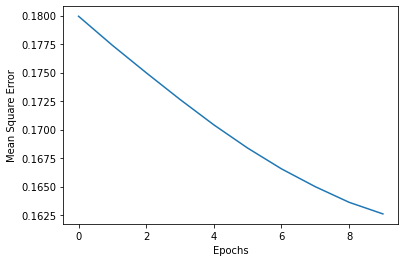

In [59]:
from matplotlib import pyplot
pyplot.plot(history.history['mean_squared_error'])
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")

pyplot.show()

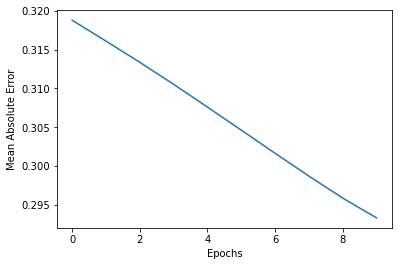

In [60]:

pyplot.plot(history.history['mae'])
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")


pyplot.show()

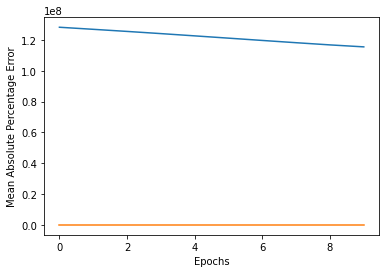

In [61]:
pyplot.plot(history.history['mape'])

plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Percentage Error")
pyplot.plot(history.history['mae'])

pyplot.show()

In [63]:
yhat = model.predict(X_test)


In [64]:
for i in range(len(y_test)):
    for j in range(len(y_test[i])):
        if(yhat[i][j] <= 0.2):
            yhat[i][j] = 0
        elif(yhat[i][j] > 0.2):
            yhat[i][j] = 1;
        

In [ ]:

for i in range()

In [37]:
model.save('modelCNN_30epochs_batch500')

INFO:tensorflow:Assets written to: modelCNN_30epochs_batch500\assets


In [65]:
results=[]
total = 0
similar = 0
for i in range(len(y_test)):
    for j in range(len(y_test[i])):
        if y_test[i][j] == yhat[i][j]:
            similar += 1
        total += 1
acc = similar/total

print('>%.3f' % acc)
results.append(acc)

>0.786
